## Logistic Regression

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


plt.style.use("seaborn-white")

df = pd.read_csv("../data/default.csv")
df.head()



C:\Users\CYRILLE\AppData\Local\Temp\ipykernel_13648\3857938532.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [3]:
df.describe().T.drop('count', axis=1)

mean           std         min           25%           50%  \
balance    835.374886    483.714985    0.000000    481.731105    823.636973   
income   33516.981876  13336.639563  771.967729  21340.462903  34552.644802   

                  75%           max  
balance   1166.308386   2654.322576  
income   43807.729272  73554.233495

In [4]:
df["default"].value_counts() #unbalanced dataset sinces NOs wayyy higher than YESs

No     9667
Yes     333
Name: default, dtype: int64

In [5]:
df["student"].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

<Axes: xlabel='balance', ylabel='income'>

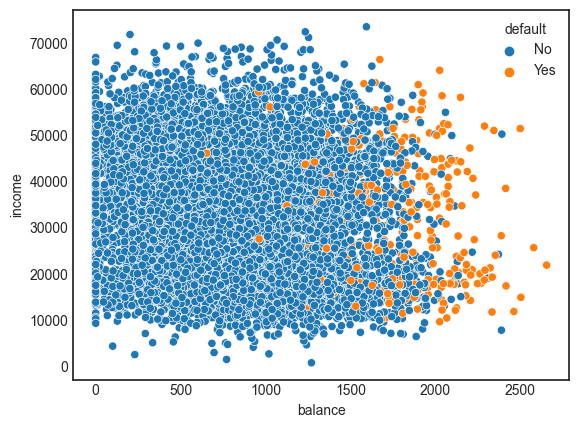

In [6]:
sns.scatterplot(data=df, x="balance", y = "income", hue = "default")
# we see that the data is very closely packed, which will be hard to train a good model for finding default 
# also the data is highly imbalanced

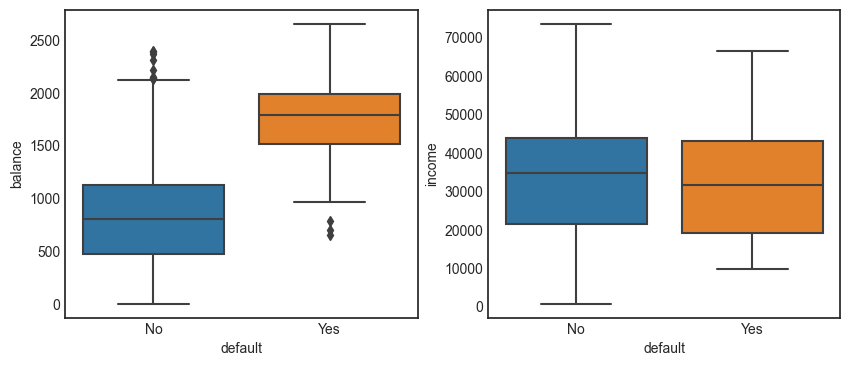

In [7]:
fig, ax = plt.subplots(1, 2, dpi=100, figsize = (10,4))

for axe, col in zip(ax, ["balance", "income"]):
    sns.boxplot(data=df, x="default", y=col, ax=axe)

# TODO clean up outliers

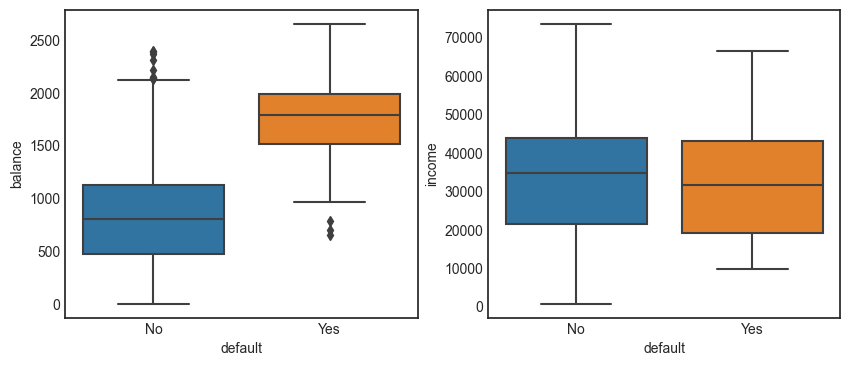

In [8]:
fig, ax = plt.subplots(1, 2, dpi=100, figsize = (10,4))
cols = ["balance", "income"]
for axe, col in enumerate(cols):
    sns.boxplot(data=df, x="default", y=col, ax=ax[axe])

## Dummy encode categorical variables

### one hot encoding

In [9]:
df0 = pd.get_dummies(df, columns = ["default", "student"])
df.head()

default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879

### dummy encoding

In [10]:
df = pd.get_dummies(df, columns = ["default", "student"], drop_first=True)
df.head()

balance        income  default_Yes  student_Yes
0   729.526495  44361.625074            0            0
1   817.180407  12106.134700            0            1
2  1073.549164  31767.138947            0            0
3   529.250605  35704.493935            0            0
4   785.655883  38463.495879            0            0

### Logistic function

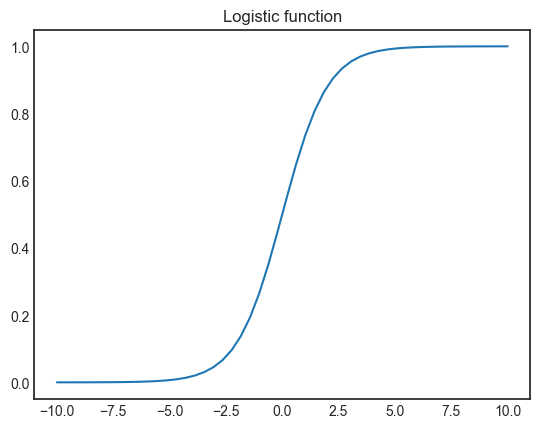

In [11]:
logistic_function = lambda x: np.exp(x)/(1+np.exp(x)) # beta_0=0,  beta_1=1

x = np.linspace(-10, 10)
plt.plot(x, logistic_function(x))
plt.title("Logistic function"); 
# values are constrained to 0 and 1, S-shaped curve



# Logistic Regression


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df.drop("default_Yes", axis=1), df["default_Yes"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = LogisticRegression(penalty = None)
model.fit(scaled_X_train, y_train) # estimated beta parameters
model.coef_, model.intercept_

(array([[ 2.888348  ,  0.00687543, -0.28952422]]), array([-6.36240853]))

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6700, 3), (3300, 3), (6700,), (3300,))

## Make sample prediction

In [14]:
#not scaled
test_sample = pd.DataFrame({"balance": [1500, 1500], "income": [
                           40000, 40000], "student_Yes": [1, 0]})

print(test_sample)
# only difference is that one is student and the other is not
scaled_test_sample = scaler.transform(test_sample)

# first column is -1 label i.e. not default, second column is label 1 i.e. default
model.predict_proba(scaled_test_sample)
# we see that being student decreases the chance of getting default 

#prob default not default 0.944, prob default 0.0551

   balance  income  student_Yes
0     1500   40000            1
1     1500   40000            0


array([[0.94485389, 0.05514611],
       [0.90084904, 0.09915096]])

In [20]:


model.predict_proba(scaled_test_sample)
# sample1: probability not default 0.944, prob default 0.055

array([[0.94485389, 0.05514611],
       [0.90084904, 0.09915096]])

In [21]:
model.predict_proba(scaled_test_sample).sum(axis=1)

array([1., 1.])

## Predict on all test data

In [19]:
y_pred_probability = model.predict_proba(scaled_X_test)
y_pred_probability[:5]

array([[9.30448543e-01, 6.95514567e-02],
       [9.98551323e-01, 1.44867725e-03],
       [9.99985411e-01, 1.45887899e-05],
       [9.99971177e-01, 2.88231783e-05],
       [9.54574467e-01, 4.54255328e-02]])

In [22]:
y_pred = model.predict(scaled_X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [23]:
y_pred.sum()

46

In [24]:
threshold = 0.5 # change threshold based on application needs - talk to domain expert

# predicted default_Yes
y_pred = (y_pred_probability > threshold)[:,1]*1

In [25]:
y_pred.sum()

46

## Evaluation

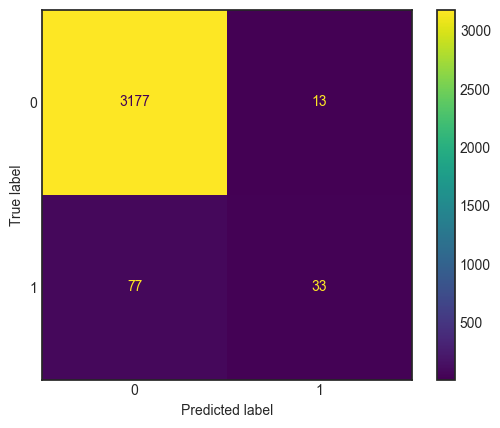

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(cm)

display.plot();

In [27]:
TP = 33
TN = 3177
FP = 13
FN = 77

accuracy = (TP+TN)/(TP+TN+FP+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)
f1 = 2*(precision*recall)/(precision+recall)

accuracy, recall, precision, f1

(0.9727272727272728, 0.3, 0.717391304347826, 0.4230769230769231)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3190
           1       0.72      0.30      0.42       110

    accuracy                           0.97      3300
   macro avg       0.85      0.65      0.70      3300
weighted avg       0.97      0.97      0.97      3300

